Caso: Utilizar la herramienta Python, Anlisis de las Venta de Chocolate

##Resumen
Conjunto de datos contiene registros detallados de las ventas de chocolate , incluyendo detalles del producto, cantidades vendidas, ingresos

# Metodologia de la recoleccion:
Los datos se agregaron de minoristas de chocolate y mercados en línea .

Sólo se incluyeron transacciones confirmadas para garantizar la precisión.

Los valores de los ingresos reflejan los precios finales después de aplicar los descuentos

# Objetivo del analisis:
Predecir las ventas de chocolates

# Variables involucradas en nuestro dataset de ventas de chocolates


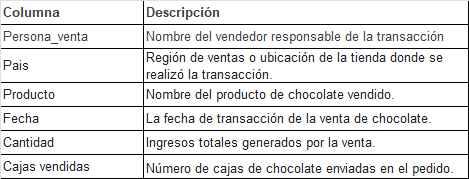

##Paso I: importar las librerias que vamos utilizar para el analisis

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Paso II: cargarmos el archivo, archivo.csv

In [140]:
# utilizando google drive
from google.colab import drive
drive.mount('/content/drive')
ruta="/content/drive/MyDrive/Python /Chocolate Sales.csv"
dato=pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
dato.head(3)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91


# Cambiar el nombre de las columnas


In [142]:
# renombrar las variables se utiliza el siguiente df.rename(columns=nuevos_nombres, inplace=True), donde nuevos_nombre es un diccionario y inplace True significa que los
# cambios se hace directamente sobre el objeto original
nuevo_nombre={"Sales Person":"Persona_venta",
              "Country":"Pais",
              "Product":"Producto",
              "Date":"fecha",
              "Amount":"Cantidad",
              "Boxes Shipped":"Cajas_vendidas"
              }
dato.rename(columns=nuevo_nombre,inplace=True)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91


##Paso III: Estructura de los datos

In [143]:
# PAra estructurar los datos tenemos que saber, Numero de columna, numero de registros, tipo de dato. etc
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]
    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])
    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Valor Único": unique
    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')
    return result_trans

In [144]:
Estructura_datos=analizar_dataframe(dato)
Estructura_datos

Cantidad de Columnas: 6
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Valor Único
0,Persona_venta,1094,object,0,Jehu Rudeforth
1,Pais,1094,object,0,UK
2,Producto,1094,object,0,Mint Chip Choco
3,fecha,1094,object,0,04-Jan-22
4,Cantidad,1094,object,0,"$5,320"
5,Cajas_vendidas,1094,int64,0,180


Observación:
El conjunto de datos está compuesto por seis columnas principales, descritas a continuación:
1. Cantidad de registros: Cada columna contiene un total de 1094 registros, lo que denota una tabla completa sin filas omitidas.
2. Tipo de Datos:Las columnas "Persona_venta", "Pais", "Producto", "fecha" y "Cantidad" son de tipo object (texto), y la columna "Caja_vendidas" es de tipo int (número enteros).
3. valores nulos: Ninguna de las columna contiene valores nulos. Lo que asegura que los datos estan completos para análisis posteriores
4. La columna fecha: nos indica que la columna fecha debe ser convertida a tipo de dato Date (fecha)
5. la columna cantidad: nos indica que se debe eliminar el caracter $ y convertir a tipo de dato numerico


##PasoIV:Corregir los errores tipograficos y formatos inconsistentes:


###A.  corregir la cantidad de estar como tipo de dato object a tipo de dato númerico.
### eliminar el caracter "$" y ","

In [145]:
# 1. Eliminar el caracter "$"y , utilizamos la funcion de string para remplazar el caracter utilizamos la expresión regular \$|,: lo que quiere decir busca y elimina cualquier caracter $ y ,
# convierte el tipo de dato object a numerico (float)(decimal)
dato['Cantidad'] = dato['Cantidad'].replace({'\$|,': ''}, regex=True).astype(float)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91


### B. Convertir la fecha de tipo de dato object a tipo de dato date##

In [146]:
# convertir el tipo de dato Fecha de string a tipo de dato Date, donde vamos especificar que el formato:"%Y-%m_%d"
dato['fecha'] = pd.to_datetime(dato['fecha']).dt.normalize()
dato.head()

<ipython-input-146-cd5f86e963da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dato['fecha'] = pd.to_datetime(dato['fecha']).dt.normalize()


,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


### C. convertir los tipos de datos string a minuscula para tener la informacion unificada en minuscula   

In [147]:
# comvertir las columna string en minuscula para unificar
dato['Persona_venta'] = dato['Persona_venta'].str.lower()
dato['Pais'] = dato['Pais'].str.lower()
dato['Producto'] = dato['Producto'].str.lower()
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91


In [148]:
# vamos a definir una funcion para convertir las columnas que son object a minuscula independientemente tenga columna string en minuscula
def convertir_a_minusculas(df):
  for col in df.select_dtypes(include=['object']):
    df[col] = df[col].str.lower()
  return df

definicion de la funcion:
1. llamamos a la funcion convertir_a_minusculas, con parametro df

2. Hacemos un ciclo con for donde le decimos en la col hasta las columnas seleccionada como string
3. a las columnas string conviertela a minuscula con la funcion str.lower()
4. retornalo al df

In [149]:
dato=convertir_a_minusculas(dato)
dato.head(3)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91


Nota: esta función puede ser usada para todo los df que quieran convertirlo las columnas string a minuscula.

## Paso V: verificar que las columnas string se encuentren agrupadas sin errores en la nomenclatura

In [150]:
# Verificar valores unicos usamos una funcion que se va a llamar mostrar_valores_unicos
def mostrar_valores_unicos(df):
  valores_unicos_por_columna = {}
  for col in df.select_dtypes(include=['object']):
        valores_unicos = df[col].unique()
        valores_unicos_por_columna[col] = valores_unicos
        print(f"Valores únicos en la columna '{col}':")
  return valores_unicos_por_columna

In [151]:
resultados=mostrar_valores_unicos(dato)
resultados

Valores únicos en la columna 'Persona_venta':
Valores únicos en la columna 'Pais':
Valores únicos en la columna 'Producto':


{'Persona_venta': array(['jehu rudeforth', 'van tuxwell', 'gigi bohling', 'jan morforth',
        'oby sorrel', 'gunar cockshoot', 'brien boise',
        'rafaelita blaksland', 'barr faughny', 'mallorie waber',
        'karlen mccaffrey', "marney o'breen", 'beverie moffet',
        'roddy speechley', 'curtice advani', 'husein augar', 'kaine padly',
        'dennison crosswaite', "wilone o'kielt", 'andria kimpton',
        'kelci walkden', 'camilla castle', 'madelene upcott',
        'dotty strutley', 'ches bonnell'], dtype=object),
 'Pais': array(['uk', 'india', 'australia', 'new zealand', 'usa', 'canada'],
       dtype=object),
 'Producto': array(['mint chip choco', '85% dark bars', 'peanut butter cubes',
        'smooth sliky salty', '99% dark & pure', 'after nines',
        '50% dark bites', 'orange choco', 'eclairs', 'drinking coco',
        'organic choco syrup', 'milk bars', 'spicy special slims',
        'fruit & nut bars', 'white choc', 'manuka honey choco',
        'almond cho

### esta es la segunda forma

In [152]:
for col in dato.select_dtypes(include=['object']):
    # Obtener los valores únicos de la columna
    valores_unicos = dato[col].unique()
    print(f"Valores únicos en la columna '{col}:")
    print(valores_unicos)
    print()


Valores únicos en la columna 'Persona_venta:
['jehu rudeforth' 'van tuxwell' 'gigi bohling' 'jan morforth' 'oby sorrel'
 'gunar cockshoot' 'brien boise' 'rafaelita blaksland' 'barr faughny'
 'mallorie waber' 'karlen mccaffrey' "marney o'breen" 'beverie moffet'
 'roddy speechley' 'curtice advani' 'husein augar' 'kaine padly'
 'dennison crosswaite' "wilone o'kielt" 'andria kimpton' 'kelci walkden'
 'camilla castle' 'madelene upcott' 'dotty strutley' 'ches bonnell']

Valores únicos en la columna 'Pais:
['uk' 'india' 'australia' 'new zealand' 'usa' 'canada']

Valores únicos en la columna 'Producto:
['mint chip choco' '85% dark bars' 'peanut butter cubes'
 'smooth sliky salty' '99% dark & pure' 'after nines' '50% dark bites'
 'orange choco' 'eclairs' 'drinking coco' 'organic choco syrup'
 'milk bars' 'spicy special slims' 'fruit & nut bars' 'white choc'
 'manuka honey choco' 'almond choco' 'raspberry choco'
 'choco coated almonds' "baker's choco chips" 'caramel stuffed bars'
 '70% dark bite

## Paso VI: validar el rango de valores que se encuentra en los limites esperados

In [153]:
min_max = pd.DataFrame({
    'Min': dato.apply(lambda col: col.min()),
    'Max': dato.apply(lambda col: col.max())
})

print("Mínimos y máximos para todas las columnas:")
print(min_max)

Mínimos y máximos para todas las columnas:
                                Min                  Max
Persona_venta        andria kimpton       wilone o'kielt
Pais                      australia                  usa
Producto             50% dark bites           white choc
fecha           2022-01-03 00:00:00  2022-08-31 00:00:00
Cantidad                        7.0              22050.0
Cajas_vendidas                    1                  709


In [154]:
# Revisamos el data set si esta limpio
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]
    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])
    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Valor Único": unique
    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')
    return result_trans

## Resultado de la limpieza de los datos

In [160]:
dato.head(10)

,Persona_venta,Pais,Producto,fecha,Cantidad,Cajas_vendidas
0,jehu rudeforth,uk,mint chip choco,2022-01-04,5320.0,180
1,van tuxwell,india,85% dark bars,2022-08-01,7896.0,94
2,gigi bohling,india,peanut butter cubes,2022-07-07,4501.0,91
3,jan morforth,australia,peanut butter cubes,2022-04-27,12726.0,342
4,jehu rudeforth,uk,peanut butter cubes,2022-02-24,13685.0,184
5,van tuxwell,india,smooth sliky salty,2022-06-06,5376.0,38
6,oby sorrel,uk,99% dark & pure,2022-01-25,13685.0,176
7,gunar cockshoot,australia,after nines,2022-03-24,3080.0,73
8,jehu rudeforth,new zealand,50% dark bites,2022-04-20,3990.0,59
9,brien boise,australia,99% dark & pure,2022-07-04,2835.0,102


In [161]:
Estructura_datos_final = analizar_dataframe(dato)
Estructura_datos_final

Cantidad de Columnas: 6
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Valor Único
0,Persona_venta,1094,object,0,jehu rudeforth
1,Pais,1094,object,0,uk
2,Producto,1094,object,0,mint chip choco
3,fecha,1094,datetime64[ns],0,2022-01-04 00:00:00
4,Cantidad,1094,float64,0,5320.0
5,Cajas_vendidas,1094,int64,0,180


In [162]:
dato.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha,1094,2022-05-03 09:04:56.160877568,2022-01-03 00:00:00,2022-03-02 00:00:00,2022-05-11 00:00:00,2022-07-04 00:00:00,2022-08-31 00:00:00,NaN
Cantidad,1094.0,5652.308044,7.0,2390.5,4868.5,8027.25,22050.0,4102.442014
Cajas_vendidas,1094.0,161.797989,1.0,70.0,135.0,228.75,709.0,121.544145


In [163]:
dato.describe(include='object').T

,count,unique,top,freq
Persona_venta,1094,25,kelci walkden,54
Pais,1094,6,australia,205
Producto,1094,22,eclairs,60
